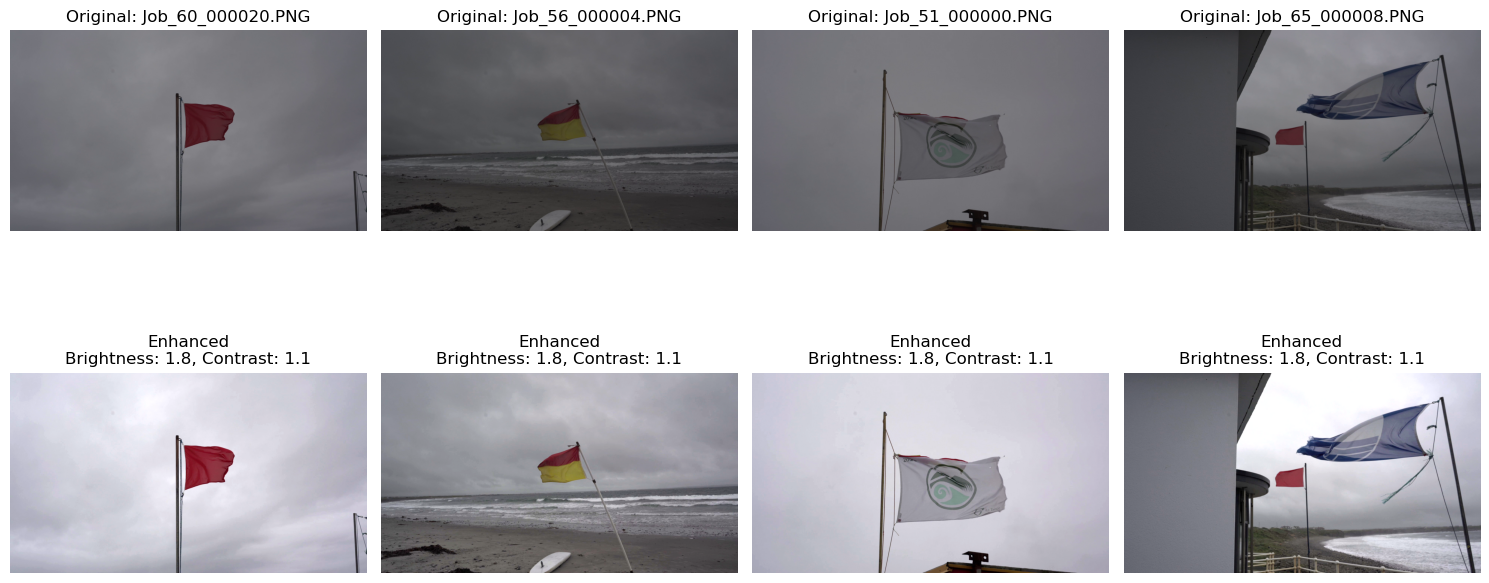

In [22]:
#A_Aug_Adjust_Brightgness_Contrast.jpynb
# Include in dissertation 
# Batch process a folder to adjust brightness and contrast.

import os
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

def enhance_image(image, brightness_factor=1.5, contrast_factor=1.3):
    """
    Enhance image by adjusting brightness and contrast.
    
    Args:
        image (PIL.Image.Image): Input image.
        brightness_factor (float): Brightness adjustment factor.
        contrast_factor (float): Contrast adjustment factor.
    
    Returns:
        PIL.Image.Image: Enhanced image.
    """
    # Adjust brightness
    enhancer = ImageEnhance.Brightness(image)
    brightened_image = enhancer.enhance(brightness_factor)

    # Adjust contrast
    enhancer = ImageEnhance.Contrast(brightened_image)
    final_image = enhancer.enhance(contrast_factor)

    return final_image

def adjust_brightness_contrast(input_folder, output_folder, brightness_factor=1.5, contrast_factor=1.3):
    """
    Process all images in a folder by adjusting brightness and contrast.
    
    Args:
        input_folder (str): Path to the input folder containing images.
        output_folder (str): Path to the output folder to save enhanced images.
        brightness_factor (float): Brightness adjustment factor.
        contrast_factor (float): Contrast adjustment factor.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    images = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Limit to first 4 images for grid visualization
    n_display = min(4, len(images))

    # Prepare grid layout for the first 4 images
    plt.figure(figsize=(15, 8))

    for i, img_name in enumerate(images[:n_display]):
        input_path = os.path.join(input_folder, img_name)
        output_path = os.path.join(output_folder, img_name)

        # Open and process the image
        image = Image.open(input_path)
        enhanced_image = enhance_image(image, brightness_factor, contrast_factor)
        enhanced_image.save(output_path)  # Save the processed image

        # Add original image to the grid
        plt.subplot(2, n_display, i + 1)
        plt.imshow(image)
        plt.title(f"Original: {img_name}")
        plt.axis("off")

        # Add enhanced image to the grid
        plt.subplot(2, n_display, i + 1 + n_display)
        plt.imshow(enhanced_image)
        plt.title(f"Enhanced\nBrightness: {brightness_factor}, Contrast: {contrast_factor}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Paths and parameters
input_folder = 'D:/FlagDetectionDatasets/Augmentation/Brighness_Contrast_Hue_Saturation/input'
output_folder = 'D:/FlagDetectionDatasets/Augmentation/Brighness_Contrast_Hue_Saturation/output'

brightness_factor = 1.8
contrast_factor = 1.1

#brightness_factor = 1.80
#contrast_factor = 1.1

adjust_brightness_contrast(input_folder, output_folder, brightness_factor, contrast_factor)
